<a href="https://colab.research.google.com/github/ahmds02/AHMADSATRIADISURYAWAN_JS1/blob/main/Decision_Tree__1_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/ASKRIPSI/data baru 2024/DATA/datakedua.csv'
data = pd.read_csv(data_path)

<ipython-input-22-610167d0d047>:3: DtypeWarning: Columns (117,133,137,139,141,144,145,146,148,163,165,167,169,172) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Import lbrary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install pandas

Melihat semua kolom

In [ ]:
print(data.columns.tolist())

['D_R', 'urut', 'psu', 'ssu', 'strata', 'wi1', 'wi2', 'r101', 'r102', 'r105', 'r401', 'r403', 'r404', 'r405', 'r406a', 'r406b', 'r406c', 'r407', 'r408', 'r409', 'r410', 'r501', 'r502', 'r503', 'r504', 'r506', 'r507', 'r508', 'r509', 'r601', 'r602', 'r603', 'r604', 'r605', 'r606', 'r606_a', 'r606_b', 'r606_x', 'r607', 'r608', 'r609', 'r610', 'r611', 'r612', 'r613', 'r614', 'r615', 'r616', 'r617', 'r618', 'r619', 'r620', 'r621', 'r701', 'r702', 'r703_a', 'r703_b', 'r703_c', 'r703_d', 'r703_x', 'r704', 'r705', 'r706', 'r707', 'r708', 'r709', 'r801', 'r802', 'r807_a', 'r807_b', 'r807_c', 'r807_x', 'r808', 'r809_a', 'r809_b', 'r809_c', 'r809_d', 'r809_e', 'r810_a', 'r810_b', 'r810_c', 'r810_d', 'r810_e', 'r810_f', 'r811_a', 'r811_b', 'r811_c', 'r811_d', 'r811_e', 'r811_f', 'r811_g', 'r811_h', 'r811_i', 'r811_j', 'r811_k', 'r811_l', 'r812', 'r901', 'r902', 'r903', 'r904', 'r905', 'r906', 'r907', 'r908', 'r909', 'r910', 'r911', 'r912', 'r913', 'r914', 'r915', 'r916', 'r1001', 'r1010', 'r1101_

Melihat missing value

In [ ]:
# Menghitung jumlah missing values dengan asumsi "#NULL!" adalah missing value
missing_values = data.replace("#NULL!", pd.NA).isna().sum()

# Menampilkan kolom dengan missing values terbanyak
print("Jumlah Missing Value per Kolom:")
print(missing_values[missing_values > 0].sort_values(ascending=False))


Jumlah Missing Value per Kolom:
r2309b5    2936
D_R        2936
r2308b5    2936
r2305b3    2936
r2304b3    2936
           ... 
r1207       151
r702        151
r1010        51
r506          8
r507          8
Length: 277, dtype: int64


Mengidentifikasi kolom yang tidak mengandung NULL!" dan 0

In [ ]:
# Mengidentifikasi kolom yang tidak mengandung "#NULL!" dan 0
clean_columns = data.columns[
    (data.replace("#NULL!", pd.NA).isna().sum() == 0) &  # Tidak ada "#NULL!"
    ((data == 0).sum() == 0)  # Tidak ada nilai 0
]

# Menampilkan kolom yang "sehat" (tanpa missing values dan tanpa 0)
print("Kolom yang tidak memiliki '#NULL!' dan '0':")
print(clean_columns.tolist())

Kolom yang tidak memiliki '#NULL!' dan '0':
['urut', 'psu', 'ssu', 'strata', 'wi1', 'wi2', 'r101', 'r102', 'r105', 'r401', 'r403', 'r404', 'r405', 'r406a', 'r406b', 'r406c', 'r410', 'r504', 'r508', 'r509', 'r601', 'r602', 'r801', 'r802', 'r808', 'r901', 'r905', 'r1102', 'r1201', 'fwt', 'r2205a', 'r2210aa', 'r301', 'r303', 'r304']


In [ ]:

# Hitung jumlah "#NULL!" dan 0 di setiap kolom
missing_counts = (data.replace("#NULL!", pd.NA).isna().sum())  # Jumlah "#NULL!"
zero_counts = (data == 0).sum()  # Jumlah angka 0

# Gabungkan kedua hasilnya
total_missing = missing_counts + zero_counts

# Urutkan kolom berdasarkan jumlah missing values + 0 (dari yang paling sedikit)
sorted_columns = total_missing.sort_values()

# Tampilkan hasilnya
print("Kolom dengan jumlah missing values ('#NULL!') dan 0 paling sedikit:")
print(sorted_columns)

Kolom dengan jumlah missing values ('#NULL!') dan 0 paling sedikit:
r406c         0
r410          0
r508          0
r602          0
r509          0
           ... 
r2306b5    2936
r2307b5    2936
r2308b5    2936
r2309b5    2936
D_R        2936
Length: 318, dtype: int64


#PEMILIHAN PARAMETER

In [ ]:
kolom_relevan = [
    'r614', 'r701', 'r706', 'r707',  'r802', 'r2210aa',
]

RENAME PARAMETER

In [ ]:
# Rename kolom
data = data.rename(columns={

    'r614': 'Ijazah_Tertinggi',
    'r701': 'Memiliki_Rekening_Tabungan',
    'r706': 'Lapangan_Pekerjaan_Utama',
    'r707': 'Status_Pekerjaan_Utama',
    'r802': 'Memiliki_Telepon_Seluler',
    'r2210aa' : 'Apakah Dalam Rumah Tangga Mempunyai Usaha Mikro',




})

# Cek hasil rename
print(data.columns)

Index(['D_R', 'urut', 'psu', 'ssu', 'strata', 'wi1', 'wi2', 'r101', 'r102',
       'r105',
       ...
       'r2307b4', 'r2308b4', 'r2309b4', 'r2302b5', 'r2304b5', 'r2305b5',
       'r2306b5', 'r2307b5', 'r2308b5', 'r2309b5'],
      dtype='object', length=318)


MENYIMPAN parameter

In [ ]:
kolom_relevan = [
    'Ijazah_Tertinggi','Memiliki_Rekening_Tabungan',
    'Lapangan_Pekerjaan_Utama','Status_Pekerjaan_Utama','Memiliki_Telepon_Seluler', 'Apakah Dalam Rumah Tangga Mempunyai Usaha Mikro',
]

data_relevan = data[kolom_relevan]


In [ ]:
print(data_relevan.info())  # Cek tipe data
print(data_relevan.head())  # Cek 5 baris pertama


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Ijazah_Tertinggi                                 2936 non-null   object
 1   Memiliki_Rekening_Tabungan                       2936 non-null   object
 2   Lapangan_Pekerjaan_Utama                         2936 non-null   object
 3   Status_Pekerjaan_Utama                           2936 non-null   object
 4   Memiliki_Telepon_Seluler                         2936 non-null   int64 
 5   Apakah Dalam Rumah Tangga Mempunyai Usaha Mikro  2936 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 137.8+ KB
None
  Ijazah_Tertinggi Memiliki_Rekening_Tabungan Lapangan_Pekerjaan_Utama  \
0                3                          5                        1   
1                8                          1                       14   

#HANDLING MISSING VALUE

visualisasi missing value


📊 Ringkasan Missing Value:
         Jumlah Missing  Persentase Missing (%)
D_R                2936              100.000000
r1202_g            2936              100.000000
r2305b5            2936              100.000000
r1204_d            2936              100.000000
r2305b3            2936              100.000000
...                 ...                     ...
r810_a             1078               36.716621
r809_d             1013               34.502725
r807_x              190                6.471390
r604                151                5.143052
r603                151                5.143052

[94 rows x 2 columns]


<ipython-input-38-349b77de0c9a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


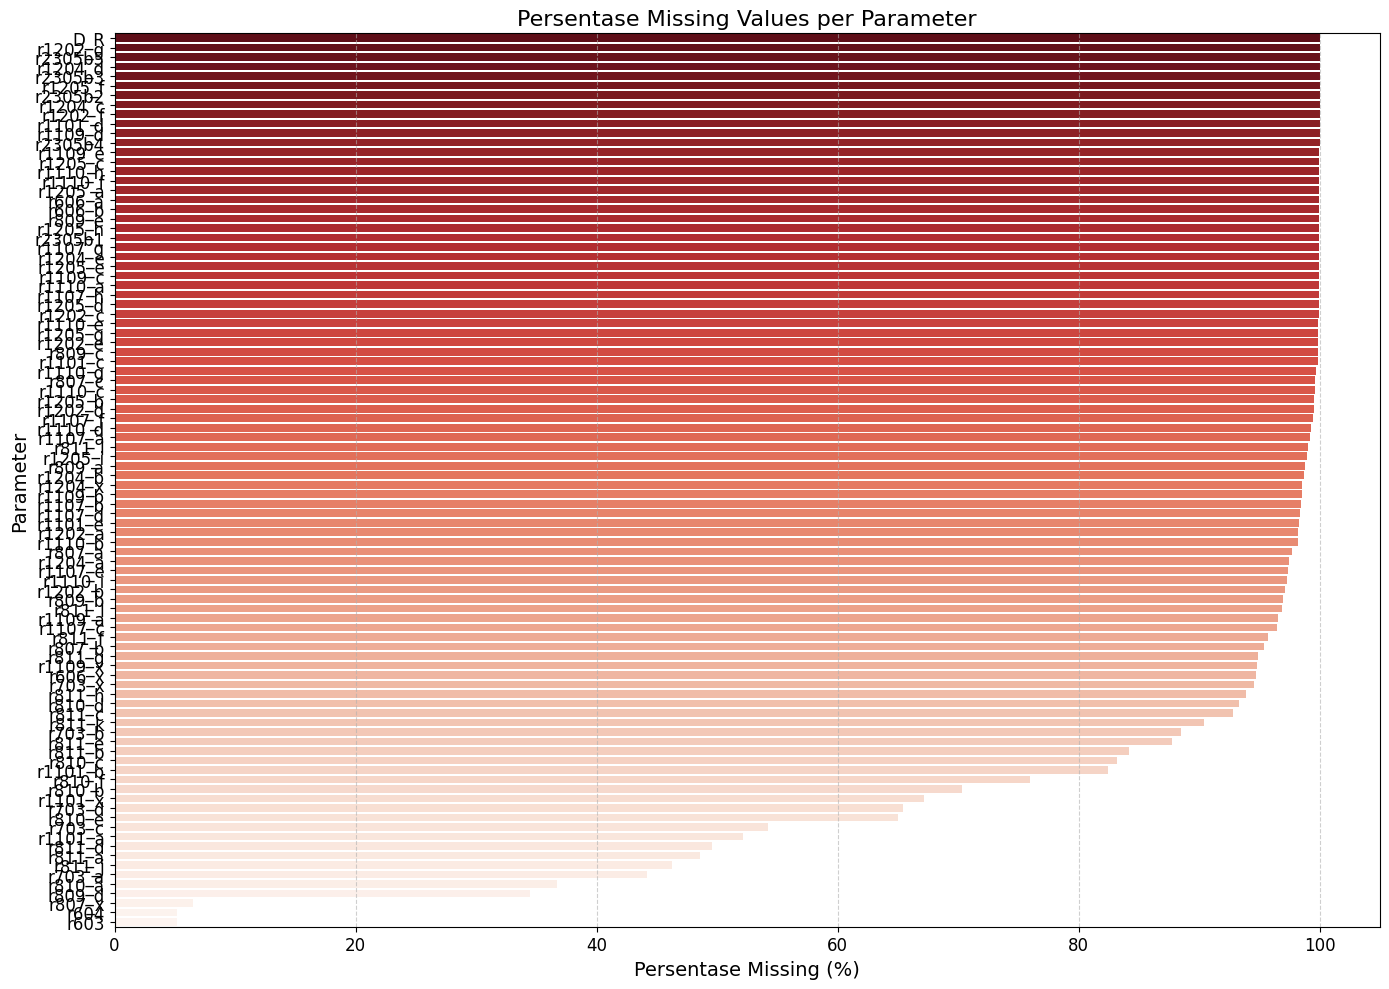

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah dan persentase missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Gabungkan ke DataFrame
missing_data = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
})
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]
missing_data = missing_data.sort_values(by='Persentase Missing (%)', ascending=False)

# Tampilkan di konsol
print("\n📊 Ringkasan Missing Value:")
print(missing_data)

# ✅ Visualisasi Bar Chart - Missing Value
plt.figure(figsize=(14, 10))  # Ukuran diperbesar
sns.barplot(
    y=missing_data.index,
    x=missing_data["Persentase Missing (%)"],
    palette="Reds_r"
)
plt.title("Persentase Missing Values per Parameter", fontsize=16)
plt.xlabel("Persentase Missing (%)", fontsize=14)
plt.ylabel("Parameter", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



 Missing Value Summary:
         Jumlah Missing  Persentase Missing (%)
D_R                2936              100.000000
r603                151                5.143052
r604                151                5.143052
r606_a             2934               99.931880
r606_b             2934               99.931880
...                 ...                     ...
r2305b1            2934               99.931880
r2305b2            2936              100.000000
r2305b3            2936              100.000000
r2305b4            2936              100.000000
r2305b5            2936              100.000000

[94 rows x 2 columns]


<ipython-input-19-4bd74ebca893>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=missing_data.index, x=missing_data["Persentase Missing (%)"], palette="coolwarm")


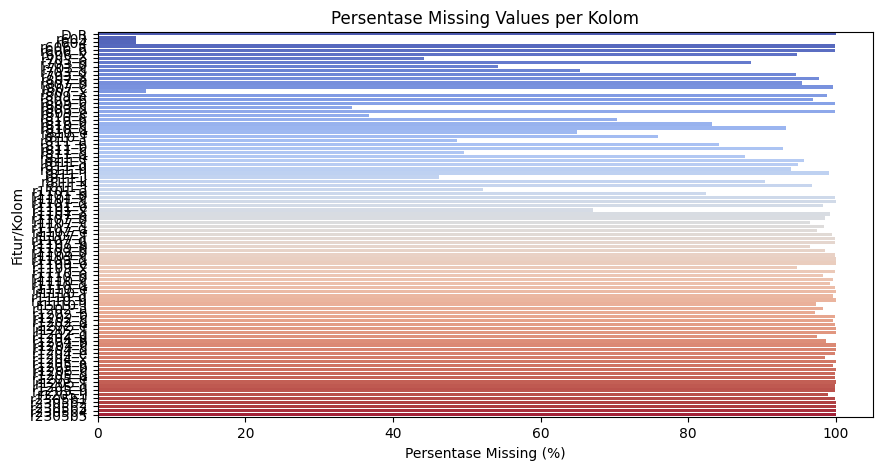

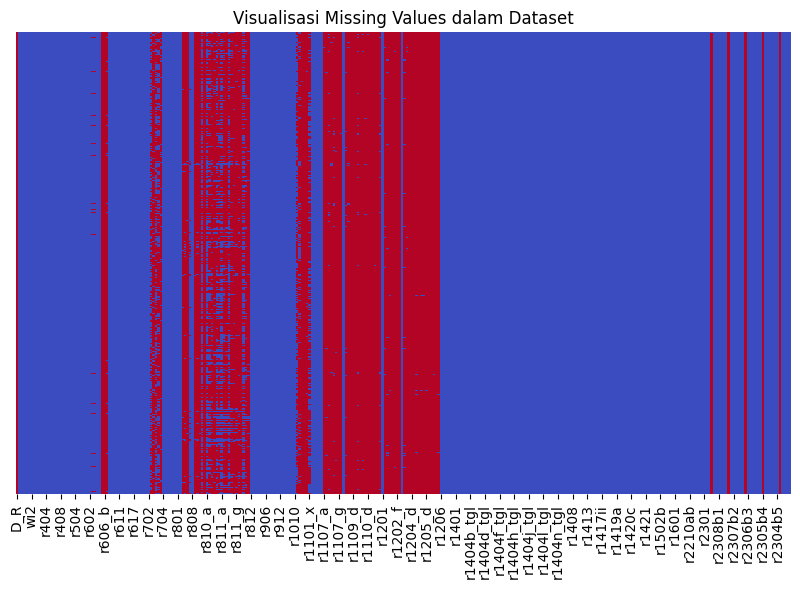

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# . Hitung jumlah missing values per kolom
missing_values = data.isnull().sum()

#  Hitung persentase missing values
missing_percentage = (missing_values / len(data)) * 100

# Gabungkan informasi dalam satu DataFrame
missing_data = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase Missing (%)': missing_percentage})
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]  # Hanya tampilkan kolom dengan missing values

# Tampilkan hasil
print("\n Missing Value Summary:")
print(missing_data)

# Visualisasi Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(y=missing_data.index, x=missing_data["Persentase Missing (%)"], palette="coolwarm")
plt.title("Persentase Missing Values per Kolom")
plt.xlabel("Persentase Missing (%)")
plt.ylabel("Fitur/Kolom")
plt.show()

#  Heatmap untuk melihat pola missing values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Visualisasi Missing Values dalam Dataset")
plt.show()


menampilkan jumlah missing value (nilai NaN dan #NULL!) per parameter

In [ ]:
# Hitung jumlah NaN di setiap kolom
missing_nan = data_relevan.isna().sum()

# Hitung jumlah "#NULL!" di setiap kolom
missing_null_str = (data_relevan == "#NULL!").sum()

# Gabungkan hasilnya dalam satu DataFrame
missing_values = pd.DataFrame({'NaN': missing_nan, '#NULL!': missing_null_str})

# Tampilkan hasil
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
                                                 NaN  #NULL!
Ijazah_Tertinggi                                   0     328
Memiliki_Rekening_Tabungan                         0     151
Lapangan_Pekerjaan_Utama                           0    1277
Status_Pekerjaan_Utama                             0    1277
Memiliki_Telepon_Seluler                           0       0
Apakah Dalam Rumah Tangga Mempunyai Usaha Mikro    0       0


 Hapus baris yang memiliki nilai NaN atau "#NULL!" atau "0"

In [ ]:
# Hapus baris yang memiliki nilai NaN atau "#NULL!" atau "0"
data_relevan = data_relevan.replace("#NULL!", pd.NA)  # Ubah "#NULL!" menjadi NaN agar bisa dihapus
data_relevan = data_relevan.replace(0, pd.NA)  # Jika "0" dianggap sebagai missing value, ubah menjadi NaN
data_relevan = data_relevan.dropna()  # Hapus semua baris yang mengandung NaN

# Cek hasil setelah penghapusan
print(f"Jumlah baris setelah menghapus missing values: {len(data_relevan)}")


Jumlah baris setelah menghapus missing values: 1612


Menyimpan hasil pemilihan parameter dan handling missing value

In [ ]:
# Simpan dataset yang sudah dibersihkan
data_relevan.to_csv("/content/drive/MyDrive/ASKRIPSI/data baru 2024/copy2eksperimen1.csv", index=False)